<a href="https://colab.research.google.com/github/mzwicker/ImplicitGeometricRegularization.pytorch/blob/master/ImplicitGeometricRegularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/mzwicker/ImplicitGeometricRegularization.pytorch
%cd ImplicitGeometricRegularization.pytorch

Cloning into 'ImplicitGeometricRegularization.pytorch'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 128 (delta 74), reused 114 (delta 67), pack-reused 0
Receiving objects: 100% (128/128), 25.43 KiB | 120.00 KiB/s, done.
Resolving deltas: 100% (74/74), done.
/content/ImplicitGeometricRegularization.pytorch


In [2]:
!python train_toy_2d.py

0.06833796098362654
0.0005465028821163287
0.00020876641383438255
0.00020169136450931546
0.00016089791188278468
0.00029877252109145047
0.00027578765957514406
0.00023413883718603756
0.00047093124157981947
0.0002015364352700999
<Figure size 1200x600 with 2 Axes>


0.06494363793171942
0.00045971121016918914
0.00025528144078634796
0.00018096975338721677
0.0002353660208882502
0.00010359498855905258
0.00012075036670466943
0.0001245006940280291
8.745155389533465e-05
0.00013273694025883742


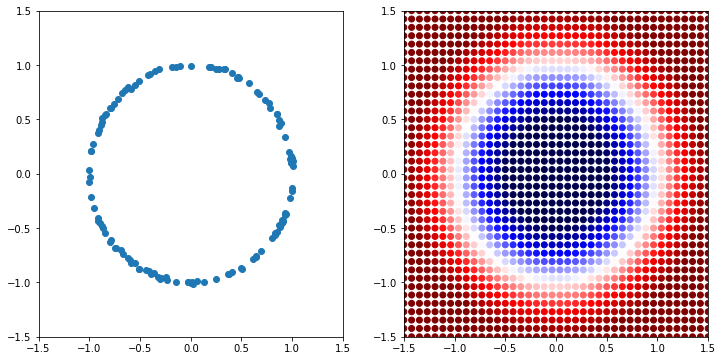

In [6]:
import random
import numpy as np

import torch
import torch.optim as optim

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from dataset import Dataset
from utils import sample_fake
from utils import build_network
from utils import train

def generate_data(nb_data=128, noise=0.0):
    t = 2 * np.random.rand(nb_data) * np.pi
    r = 1.0 + np.random.randn(nb_data) * noise
    pts = np.stack((r * np.cos(t), r * np.sin(t)), axis=1)
    return pts

def predict(centers, device, threshold=0.4):
    x = np.linspace(-1.5, 1.5, 40)
    y = np.linspace(-1.5, 1.5, 40)
    X, Y = np.meshgrid(x, y)
    
    X = X.reshape(-1)
    Y = Y.reshape(-1)
    pts = np.stack((X, Y), axis=1)

    net.eval()
    val = net(torch.Tensor(pts).to(device))
    val = val.reshape(-1).detach().cpu().numpy()

    return pts, val
    
def plot_data(x, y, v):
    plt.figure(figsize=(12, 6))

    plt.subplot(1,2,1)
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    plt.scatter(x[:,0], x[:,1])
 
    plt.subplot(1,2,2)
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    plt.scatter(y[:,0], y[:,1], c=v, cmap=cm.seismic, vmin=-0.5, vmax=0.5)
    plt.show()

if __name__ == '__main__':
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    x = generate_data(nb_data=128, noise=0.01)

    dataset = Dataset(x, knn=10)
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True)
    
    net = build_network(input_dim=2)
    net.to(device)

    optimizer = optim.Adam(net.parameters())

    for itr in range(1000):
        loss = train(net, optimizer, data_loader, device)
        if itr % 100 == 0:
            print(loss)

    y, v = predict(x, device)
    
    plot_data(x, y, v)

In [7]:
torch.cuda.get_device_name(0)

'Tesla P4'

0.07688702805899084
Traceback (most recent call last):
  File "train_toy_2d.py", line 65, in <module>
    loss = train(net, optimizer, data_loader, device)
  File "/content/ImplicitGeometricRegularization.pytorch/utils.py", line 38, in train
    net.zero_grad()
  File "/usr/local/lib/python3.6/dist-packages/torch/nn/modules/module.py", line 1113, in zero_grad
    for p in self.parameters():
  File "/usr/local/lib/python3.6/dist-packages/torch/nn/modules/module.py", line 884, in parameters
    for name, param in self.named_parameters(recurse=recurse):
  File "/usr/local/lib/python3.6/dist-packages/torch/nn/modules/module.py", line 910, in named_parameters
    for elem in gen:
  File "/usr/local/lib/python3.6/dist-packages/torch/nn/modules/module.py", line 854, in _named_members
    for module_prefix, module in modules:
  File "/usr/local/lib/python3.6/dist-packages/torch/nn/modules/module.py", line 1052, in named_modules
    for m in module.named_modules(memo, submodule_prefix):
  File 